# What is an Image?

- A digital image contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what colour each pixel should be.
- The brightness & colour can be represented as a numerical vector.

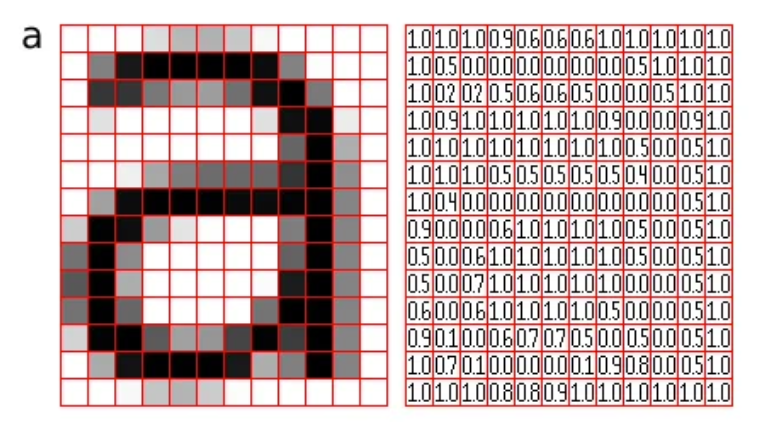


# What is a Kernel?




- Kernels (a matrix) are applied on top of images to achieve many transformations & detections - edge detection, human detection, face detection, blur, smoothening, etc.


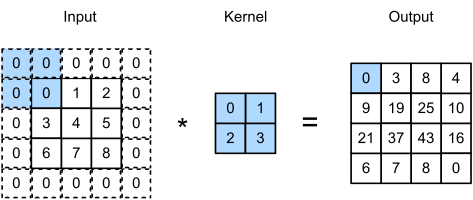

Let's look at a detailed example: https://setosa.io/ev/image-kernels/

- Modern day deep learning networks allow for complex kernel creation in an automated fashion.




# Perceptron (or Neuron) - A recap

- It has four main parameters: input values, weights and Bias, net sum, and an activation function.
- Bias provide an offset (map it to intercept).
- Weight represent impact of each input value.
- Activation function scales the overall output to a predefined range, and add non-linearity overall.
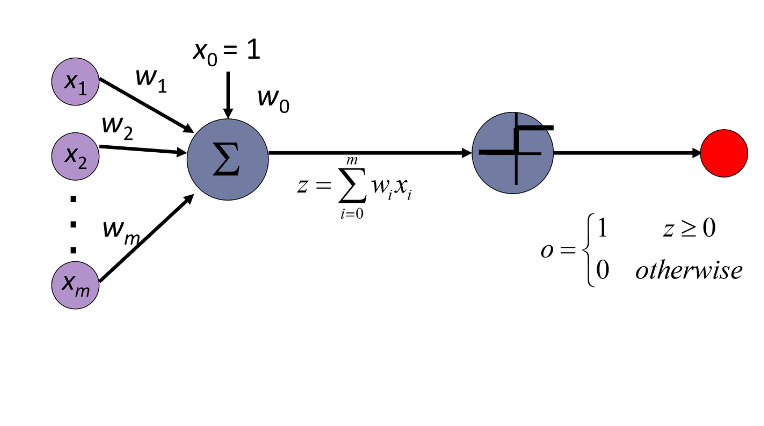


# Convolutional Neural Network
A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer.

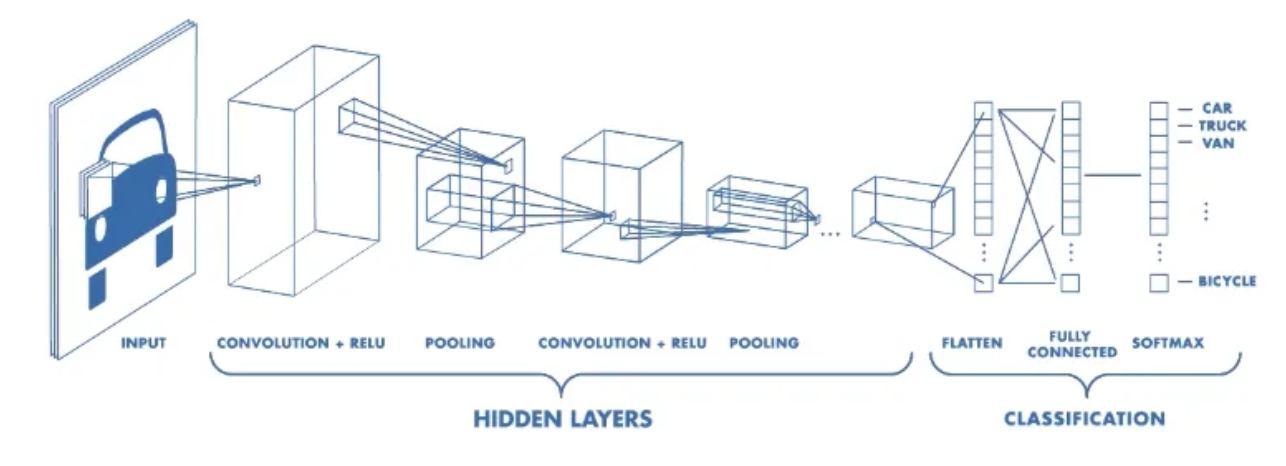

## The Convolution Layer

- The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load.
- This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the small portion of the input image.
This process is called convolution
- Convolution leverages three important ideas that motivated computer vision researchers: sparse interaction, parameter sharing, and equivariant representation.


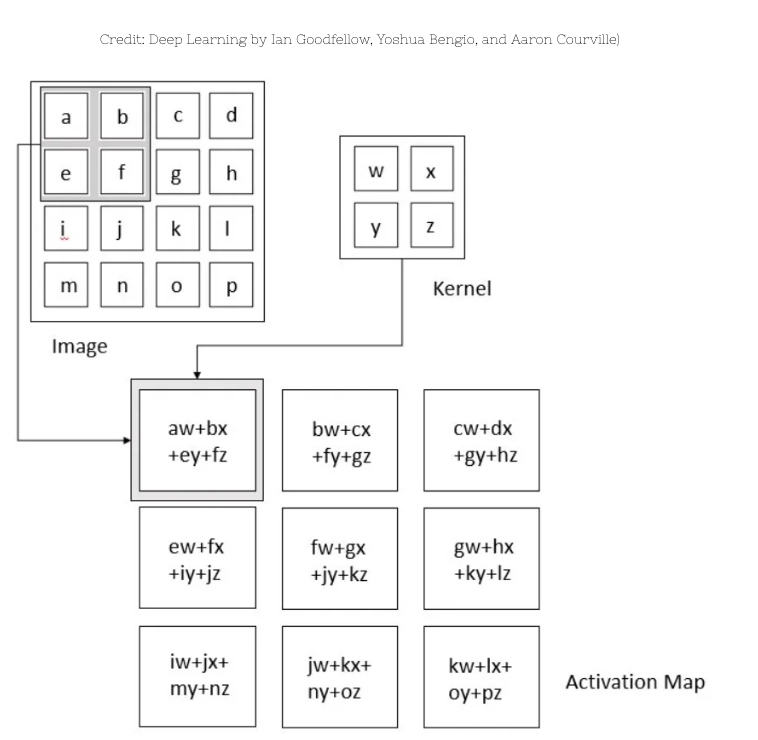

## The Pooling Layer

- The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs.
- This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights.
- There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel.
- However, the most popular process is max pooling, which reports the maximum output from the neighborhood.


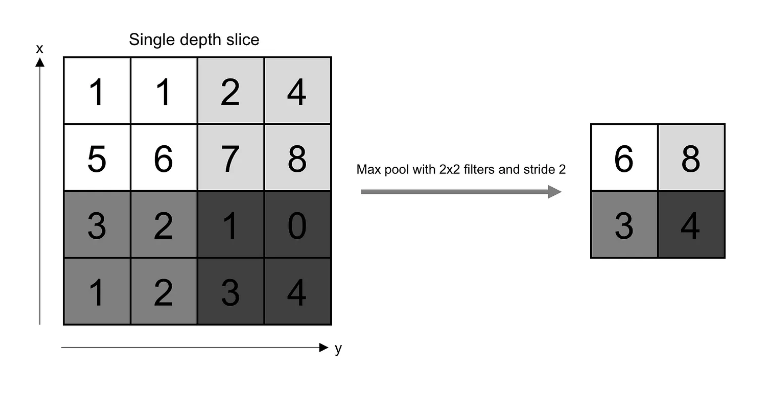


https://miro.medium.com/v2/resize:fit:1400/1*ulfFYH5HbWpLTIfuebj5mQ.gif

## The Fully Connected Layer

- Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular ANN.

- The FC layer helps to map the representation between the input and the output.


# Convolutional Neural Networks for MNIST Dataset Classification

## Basic Setup

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


##  Visualizing the Image Data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# There are 60K images in the training dataset
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
single_image.shape

(28, 28)

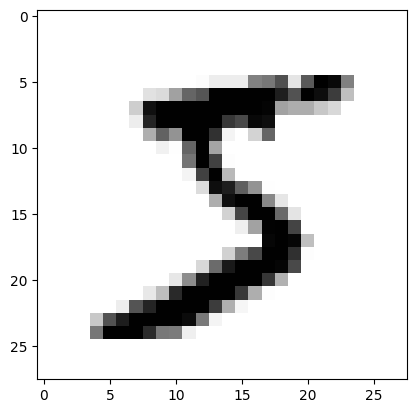

In [ ]:
plt.imshow(single_image, cmap = 'binary');

## Preprocessing Data

### Preprocessing the labels

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train[0]

5

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

### Preprocessing the Input

In [ ]:
print(single_image.max())
print(single_image.min())

255
0


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0]

In [ ]:
scaled_single.max()

1.0

In [ ]:
scaled_single.min()

0.0

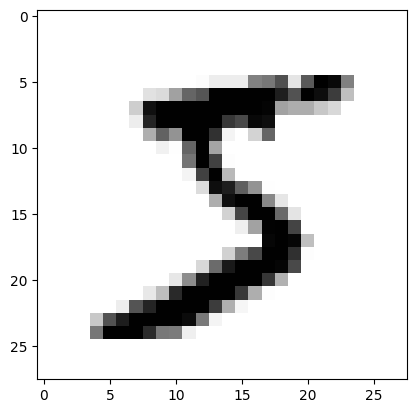

In [ ]:
plt.imshow(scaled_single, cmap = 'binary')

### Reshaping the data
Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [ ]:
# Reshape to include channel dimension (in this case, 1 channel)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Model Instantiation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
help(Conv2D)

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=16, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 784 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(784, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 784)               1807120   
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1815242 (6.92 MB)
Trainable params: 1815242 (6.92 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1169 - accuracy: 0.9650 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0475 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0350 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0412 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0483 - val_accuracy: 0.9853


In [ ]:
losses = pd.DataFrame(model.history.history)

## Model Predictions

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# [0.01, 0.3, 0.08, 0.08, 0.08, 0.01, 0.3, 0.07]

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

7

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Model Evaluation

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.116923,0.964967,0.049229,0.9849
1,0.039493,0.987300,0.047492,0.9850
2,0.023185,0.992450,0.034985,0.9891
3,0.015869,0.994883,0.041226,0.9872
4,0.010680,0.996633,0.048254,0.9853


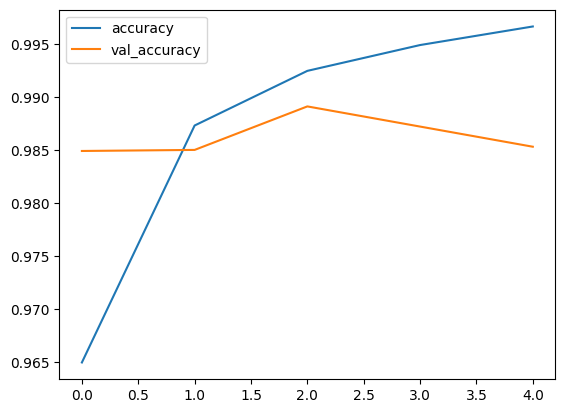

In [ ]:
losses[['accuracy','val_accuracy']].plot();

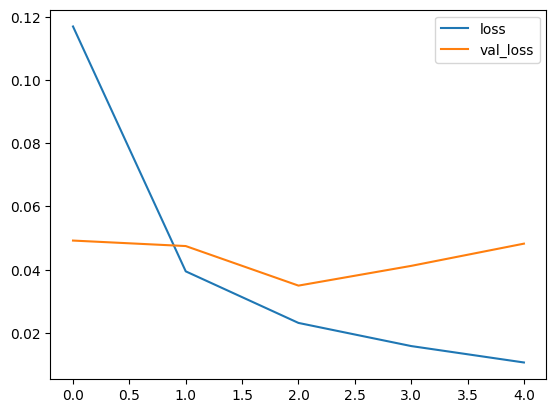

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04825377091765404, 0.9853000044822693]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 959    1    1    2    0    0   10    0    0    7]
 [   0 1126    2    3    0    0    1    2    1    0]
 [   1    0 1017    0    5    0    0    8    1    0]
 [   0    0    3 1003    0    0    0    1    2    1]
 [   0    1    0    0  970   

<Axes: >

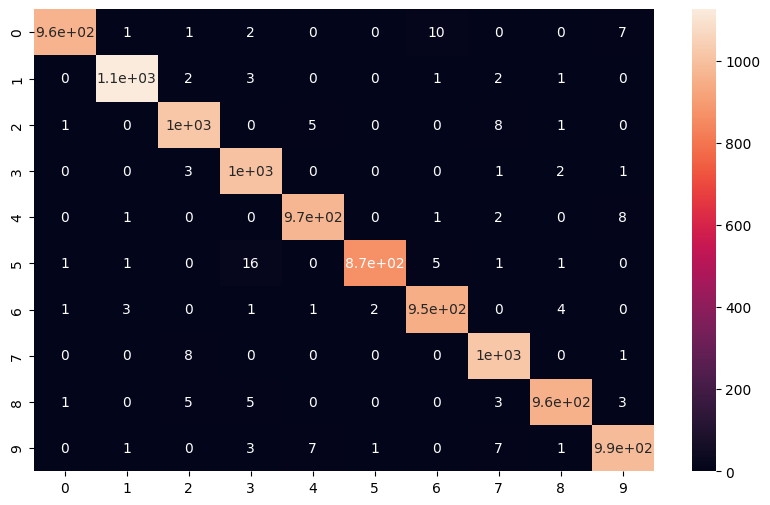

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

## Predicting on one data point

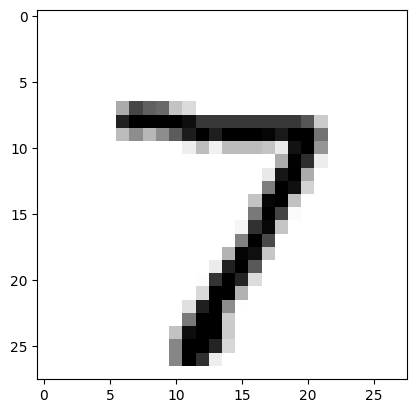

In [ ]:
my_number = x_test[0] # (28, 28, 1)
plt.imshow(my_number.reshape(28,28), cmap = 'binary');

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
my_prediction = model.predict(my_number.reshape(1,28,28,1))
my_prediction = np.argmax(my_prediction, axis=-1)
print(my_prediction)

1/1 [==============================] - 0s 82ms/step
[7]


# InceptionNet

In a typical CNN layer, we make a choice to either have a stack of 3x3 filters, or a stack of 5x5 filters or a max pooling layer. In general all of these are beneficial to the modelling power of the network. The inception module suggests the use of all of them.


This means instead of adding a particular filter size layer, we add all 1x1, 3x3, 5x5 filters and perform convolution on the output from the previous layers. Since pooling has been essential for the success of current CNNs, the inception module also includes an additional pooling path.The output of all the filters are concatenated and passed on as input to the next layer.

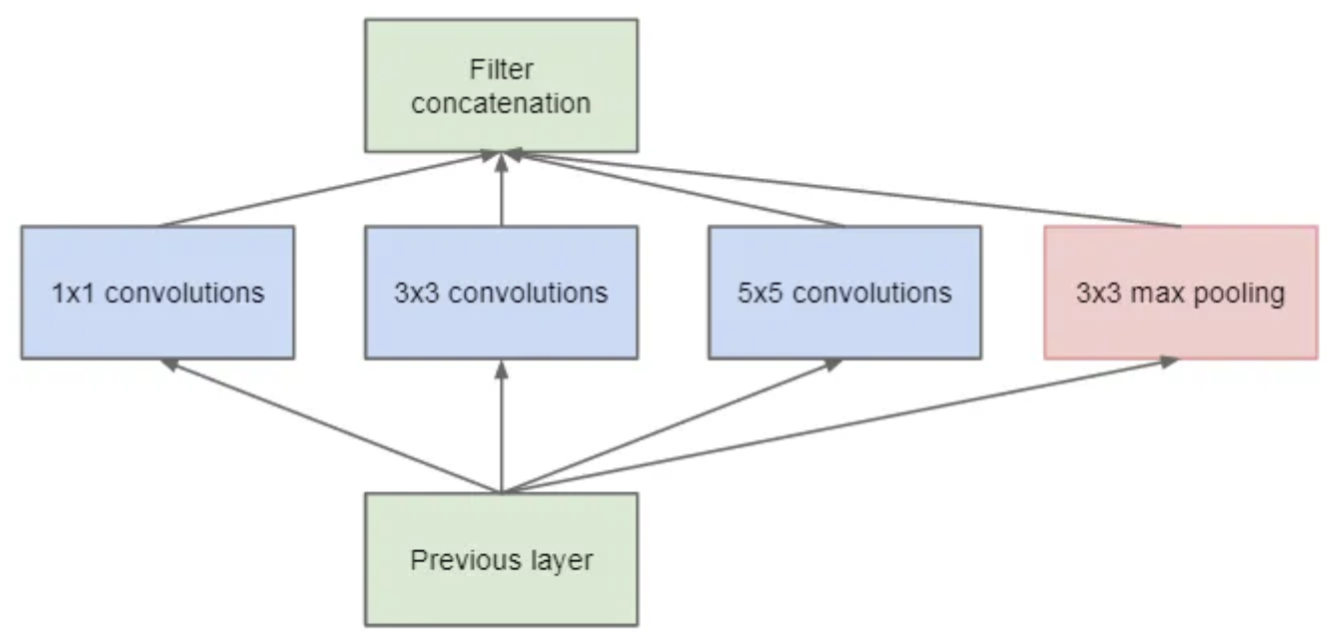


# InceptionNet for CIFAR-10 Multi-Class Classification

Let's go over another example of using Keras and building out InceptionNets. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

## Basic Setup

In [ ]:
import pandas as pd
import numpy as np

# CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

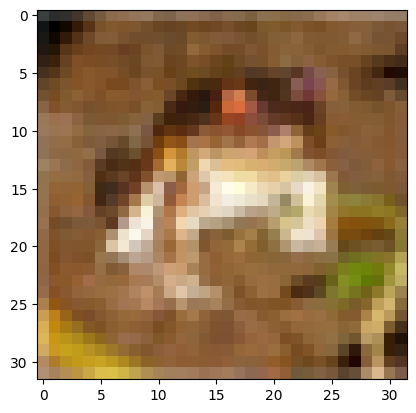

In [ ]:
import matplotlib.pyplot as plt
# FROG
plt.imshow(x_train[0])

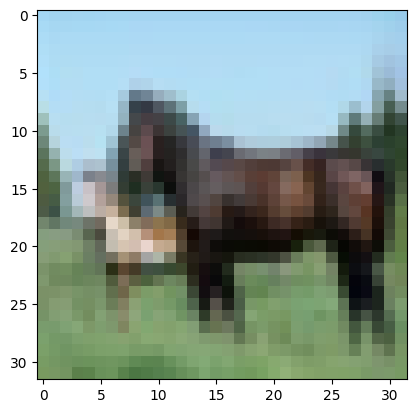

In [ ]:
# HORSE
plt.imshow(x_train[12])

## Preprocessing the data

### Preprocessing the labels

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_test = to_categorical(y_test,10)

### Preprocessing the Input

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
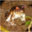

In [ ]:
x_train[0]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

## Model Instantiation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Concatenate

In [ ]:
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

In [ ]:
output = Concatenate(axis = 3)([tower_1, tower_2, tower_3])

In [ ]:
output = Flatten()(output)
out = Dense(10, activation='softmax')(output)

In [ ]:
from keras.models import Model
model = Model(inputs = input_img, outputs = out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 64)           256       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 64)           256       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 3)            0         ['input_1[0][0]']             
 g2D)                                                                                         

## Model Training

In [ ]:
epochs = 25
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=epochs)

Epoch 1/25
1563/1563 [==============================] - 23s 13ms/step - loss: 1.5638 - accuracy: 0.4533 - val_loss: 1.4324 - val_accuracy: 0.4924
Epoch 2/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2778 - accuracy: 0.5511 - val_loss: 1.3811 - val_accuracy: 0.5179
Epoch 3/25
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0952 - accuracy: 0.6219 - val_loss: 1.1913 - val_accuracy: 0.5865
Epoch 4/25
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9570 - accuracy: 0.6687 - val_loss: 1.1967 - val_accuracy: 0.5885
Epoch 5/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8561 - accuracy: 0.7036 - val_loss: 1.2486 - val_accuracy: 0.5872
Epoch 6/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7621 - accuracy: 0.7370 - val_loss: 1.2928 - val_accuracy: 0.5861
Epoch 7/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6788 - accuracy: 0.7649 - val_loss: 1.3959 -

InceptionNet v3 is used in [DeepDream](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/deepdream.ipynb)!

# ResNet-50

ResNet stands for Residual Network and is a specific type of convolutional neural network (CNN).

ResNet-50 is a 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer). Residual neural networks are a type of artificial neural network (ANN) that forms networks by stacking residual blocks.

The ResNet architecture follows two basic design rules. First, the number of filters in each layer is the same depending on the size of the output feature map. Second, if the feature map’s size is halved, it has double the number of filters to maintain the time complexity of each layer.

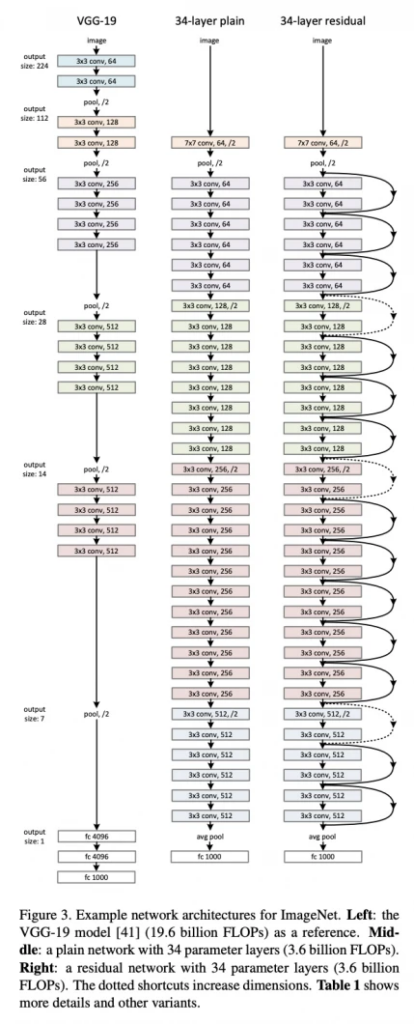

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load the ResNet-50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

img_path = '/content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

35363/35363 [==============================] - 0s 0us/step
Predictions:
1: Labrador_retriever (0.77)
2: golden_retriever (0.22)
3: kuvasz (0.01)


https://keras.io/api/applications/